# 4.10 - Coding Etiquette & Excel Reporting

# 1. Import libraries

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# Import Data

In [83]:
# folder path
path = r'C:\Users\jpelc\Documents\01-2023 Instacart Basket Analysis'
path_visual = r'C:\Users\jpelc\Documents\01-2023 Instacart Basket Analysis\04 Analysis\Visualizations'

In [3]:
# importing pickle file 
ords_prods_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_ords_prods_custm.pkl'))
df_depts = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'departments_wrangled.csv'))

In [4]:
#checking imported file 
ords_prods_all.shape

(32404859, 31)

# 2. Data Security

The PII data was addressed previously, columns where removed to ensure customer privacy.

In [5]:
# checking columns
ords_prods_all.columns

Index(['order_id', 'user_id', 'order_number', 'orders_day_of_week',
       'order_hour_of_day', 'days_since_prior_order', 'product_id',
       'add_to_cart_order', 'reordered', 'product_name', 'aisle_id',
       'department_id', 'prices', '_merge', 'price_range_loc', 'busiest_day',
       'busiest_days', 'busiest_period_of_day', 'max_order', 'loyalty_flag',
       'average_price', 'spending_flag', 'median_prior_orders',
       'order_frequency_flag', 'gender', 'state', 'age', 'registration_date',
       'num_dependants', 'marital_status', 'income'],
      dtype='object')

## 3. Comparing Customer Behavior across Geographic Regions

### Group the states into regions

In [6]:
#Checking State column
ords_prods_all['state'].value_counts(dropna = False)

Pennsylvania            667082
California              659783
Rhode Island            656913
Georgia                 656389
New Mexico              654494
Arizona                 653964
North Carolina          651900
Oklahoma                651739
Alaska                  648495
Minnesota               647825
Massachusetts           646358
Wyoming                 644255
Virginia                641421
Missouri                640732
Texas                   640394
Colorado                639280
Maine                   638583
North Dakota            638491
Alabama                 638003
Kansas                  637538
Louisiana               637482
Delaware                637024
South Carolina          636754
Oregon                  636425
Arkansas                636144
Nevada                  636139
New York                635983
Montana                 635265
South Dakota            633772
Illinois                633024
Hawaii                  632901
Washington              632852
Mississi

In [7]:
#Define regoinal lists
region_NE = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
region_MW = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
region_S = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
region_W = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [8]:
#Create new column Region based on region list
ords_prods_all.loc[ords_prods_all['state'].isin(region_NE), 'region'] = 'Northeast'
ords_prods_all.loc[ords_prods_all['state'].isin(region_MW), 'region'] = 'Midwest'
ords_prods_all.loc[ords_prods_all['state'].isin(region_S), 'region'] = 'South'
ords_prods_all.loc[ords_prods_all['state'].isin(region_W), 'region'] = 'West'

In [9]:
#Check region values
ords_prods_all['region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

In [10]:
#check dimensions 
ords_prods_all.shape

(32404859, 32)

### Check the spending habits across regions

In [11]:
#Crosstab spending habits across regions
crosstab_spending_habits = pd.crosstab (ords_prods_all['region'], ords_prods_all['spending_flag'], dropna = False)

In [12]:
crosstab_spending_habits

spending_flag,High spender,Low spender
region,,
Midwest,29444,7567881
Northeast,18662,5704074
South,40890,10750995
West,31347,8261566


## 4. Creating an exclusion flag for low-activity customers

In [13]:
ords_prods_all.loc[ords_prods_all['max_order'] <5, 'activity_flag'] = 'Low activity'

In [14]:
ords_prods_all.loc[ords_prods_all['max_order'] >=5, 'activity_flag'] = 'High activity'

In [15]:
ords_prods_all.tail()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency_flag,gender,state,age,registration_date,num_dependants,marital_status,income,region,activity_flag
32404854,156685,106143,26,4,23,5.0,19675,1,1,Organic Raspberry Black Tea,...,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,West,High activity
32404855,484769,66343,1,6,11,NaN,47210,1,0,Fresh Farmed Tilapia Fillet,...,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151,South,Low activity
32404856,1561557,66343,2,1,11,30.0,47210,1,1,Fresh Farmed Tilapia Fillet,...,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151,South,Low activity
32404857,276317,66343,3,6,15,19.0,47210,1,1,Fresh Farmed Tilapia Fillet,...,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151,South,Low activity
32404858,2922475,66343,4,1,12,30.0,47210,1,1,Fresh Farmed Tilapia Fillet,...,Non-frequent customer,Female,Tennessee,22,9/12/2017,3,married,46151,South,Low activity


In [16]:
# Check frequency of new activity_flag column
ords_prods_all['activity_flag'].value_counts(dropna = False)

High activity    30964564
Low activity      1440295
Name: activity_flag, dtype: int64

In [17]:
#create a subset which EXCLUDES low_activity customers
high_activity_cust =ords_prods_all[ords_prods_all['activity_flag'] == 'High activity']

In [18]:
high_activity_cust.tail()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,order_frequency_flag,gender,state,age,registration_date,num_dependants,marital_status,income,region,activity_flag
32404850,3308056,106143,22,4,20,10.0,19675,1,1,Organic Raspberry Black Tea,...,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,West,High activity
32404851,2988973,106143,23,2,22,5.0,19675,1,1,Organic Raspberry Black Tea,...,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,West,High activity
32404852,930,106143,24,6,12,4.0,19675,1,1,Organic Raspberry Black Tea,...,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,West,High activity
32404853,467253,106143,25,6,16,7.0,19675,1,1,Organic Raspberry Black Tea,...,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,West,High activity
32404854,156685,106143,26,4,23,5.0,19675,1,1,Organic Raspberry Black Tea,...,Frequent customer,Male,Hawaii,25,5/26/2017,0,single,53755,West,High activity


In [19]:
#export high_activity_custm dataframe
high_activity_cust.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'high activity customers.pkl'))

## 5. Customer Profiling

In [20]:
#import high_activity_custm dataframe
custmrs = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'high activity customers.pkl'))

#### Departments

In [21]:
#checking departments
df_depts

,Unnamed: 0,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol
5,6,international
6,7,beverages
7,8,pets
8,9,dry goods pasta
9,10,bulk


In [22]:
# rename column
df_depts.rename(columns= {"Unnamed: 0": "department_id"}, inplace = True)

In [23]:
# Create a data dictionary for departments
data_dict = dict(zip(df_depts["department_id"], df_depts["department"]))

In [24]:
# Create a new column to convert department_id
custmrs['department'] = custmrs['department_id'].map(data_dict)

In [25]:
# Check department column
custmrs['department'].value_counts(dropna = False)

produce            9079273
dairy eggs         5177182
snacks             2766406
beverages          2571901
frozen             2121731
pantry             1782705
bakery             1120828
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699857
meat seafood        674781
breakfast           670850
personal care       424306
babies              410392
international       255991
alcohol             144627
pets                 93060
missing              64768
other                34411
bulk                 33451
Name: department, dtype: int64

Text(0.5, 0, 'Department')

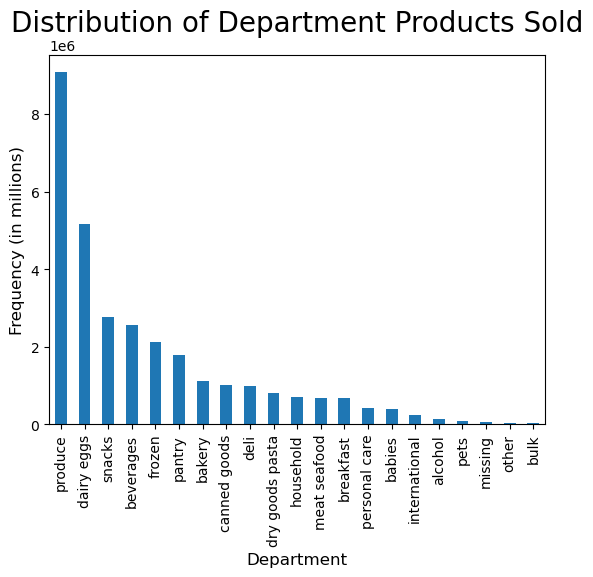

In [26]:
# Create a bar chart for distribution of departments
bar_departments = custmrs['department'].value_counts().plot.bar()

plt.title('Distribution of Department Products Sold', fontsize = 20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Department', fontsize = 12)

### Customers based on Age

In [27]:
# Verify age column
custmrs['age'].describe()

count    3.096456e+07
mean     4.946803e+01
std      1.848528e+01
min      1.800000e+01
25%      3.300000e+01
50%      4.900000e+01
75%      6.500000e+01
max      8.100000e+01
Name: age, dtype: float64

#### The age grouping will be divided  as follows:
- Young Adult : 18-39
- Middle Aged : 40-64
- Senior      : 65+

In [28]:
# Create the age groups
custmrs.loc[(custmrs['age'] >= 18) & (custmrs['age'] < 40), 'age_group'] = 'Young Adult'
custmrs.loc[(custmrs['age'] >= 40) & (custmrs['age'] < 65), 'age_group'] = 'Middle-Aged'
custmrs.loc[custmrs['age'] >= 65, 'age_group'] = 'Senior'

In [29]:
custmrs.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,state,age,registration_date,num_dependants,marital_status,income,region,activity_flag,department,age_group
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Alabama,31,2/17/2019,3,married,40423,South,High activity,beverages,Young Adult
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,South,High activity,beverages,Young Adult
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,South,High activity,beverages,Young Adult
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,South,High activity,beverages,Young Adult
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Alabama,31,2/17/2019,3,married,40423,South,High activity,beverages,Young Adult


In [30]:
# Check frequency of age_group
custmrs['age_group'].value_counts(dropna = False)

Middle-Aged    12103910
Young Adult    10665110
Senior          8195544
Name: age_group, dtype: int64

Text(0.5, 1.0, 'Customer Age Categories')

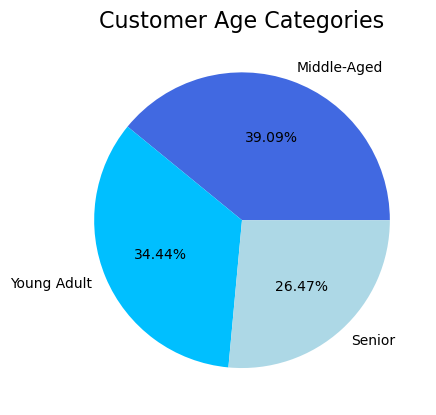

In [31]:
# Pie chart for customer age categories
age_category_pie = custmrs['age_group'].value_counts().plot.pie(labels = ['Middle-Aged', 'Young Adult', 'Senior' ], autopct=('%.2f%%'), colors = ['royalblue', 'deepskyblue', 'lightblue', 'lightsteelblue'],\
                label = '')
plt.title("Customer Age Categories", fontsize = '16')

In [32]:
#crosstab on age_category and region
crosstab_age_by_region = pd.crosstab (custmrs['region'], custmrs['age_group'], dropna = False)

In [33]:
crosstab_age_by_region

age_group,Middle-Aged,Senior,Young Adult
region,,,
Midwest,2874466,1904046,2483001
Northeast,2108141,1484807,1871737
South,3994431,2708461,3608247
West,3126872,2098230,2702125


#### Aggregate max, mean, min

In [34]:
#age_group category expenditure aggregation
custmrs.groupby('age_group').agg({'prices' : ['mean', 'min', 'max']})

prices           
                 mean  min   max
age_group                       
Middle-Aged  7.790702  1.0  25.0
Senior       7.795896  1.0  25.0
Young Adult  7.784026  1.0  25.0

In [35]:
#age_group category frequency aggregation
custmrs.groupby('age_group').agg({'add_to_cart_order' : ['mean', 'min', 'max']})

add_to_cart_order         
                         mean min  max
age_group                             
Middle-Aged          8.354216   1  145
Senior               8.307779   1   99
Young Adult          8.415515   1  109

#### Compare profile across departments

In [36]:
# Compare Age groups across departments
ct_income_department = pd.crosstab(custmrs['department'], custmrs['age_group'], dropna = False, normalize = 'columns')
ct_income_department

age_group,Middle-Aged,Senior,Young Adult
department,,,
alcohol,0.004650,0.004477,0.004843
babies,0.013445,0.012959,0.013263
bakery,0.036255,0.036117,0.036193
beverages,0.083750,0.083462,0.081966
breakfast,0.021779,0.021389,0.021747
bulk,0.001064,0.001091,0.001090
canned goods,0.032622,0.032641,0.032791
dairy eggs,0.166542,0.166929,0.168147
deli,0.032451,0.032359,0.032428


#### Create a suitable chart

Text(0.5, 0, 'Regions')

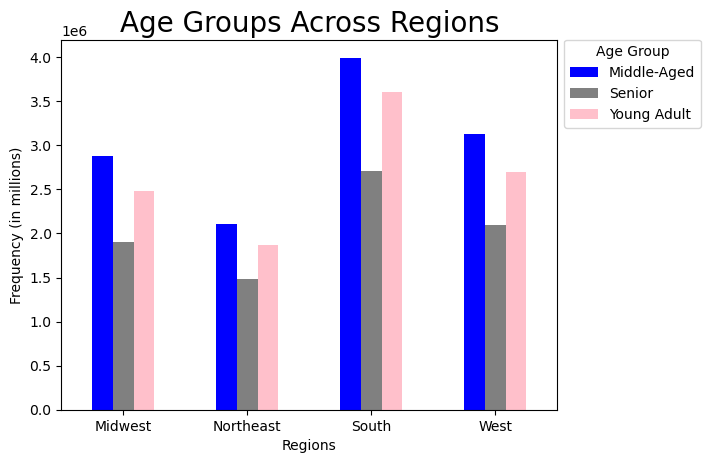

In [37]:
# Create bar chart for Age group across regions
bar_chart_age_by_region = crosstab_age_by_region.plot (kind='bar', rot = 0, color = ['blue', 'grey', 'pink'])
bar_chart_age_by_region.legend(title = 'Age Group', bbox_to_anchor = (1, 1.02), loc = 'upper left')
plt.title('Age Groups Across Regions', fontsize = 20)
plt.ylabel('Frequency (in millions)')
plt.xlabel('Regions')

#### Alcohol category

In [38]:
#create conditions for 'alcohol' Bar graph
custmrs.loc[custmrs['department'] == 'alcohol', 'buys_alcohol'] = 'Alcohol purchased'

In [39]:
#create conditions for 'alcohol' Pie chart
custmrs.loc[custmrs['department'] =='alcohol', 'alcohol_purchase'] = 'Yes'
custmrs.loc[custmrs['department'] !='alcohol', 'alcohol_purchase'] = 'No'

In [40]:
custmrs['buys_alcohol'].value_counts(dropna = False)

NaN                  30819937
Alcohol purchased      144627
Name: buys_alcohol, dtype: int64

Text(0.5, 1.0, 'Customers Who Purchase Alcohol')

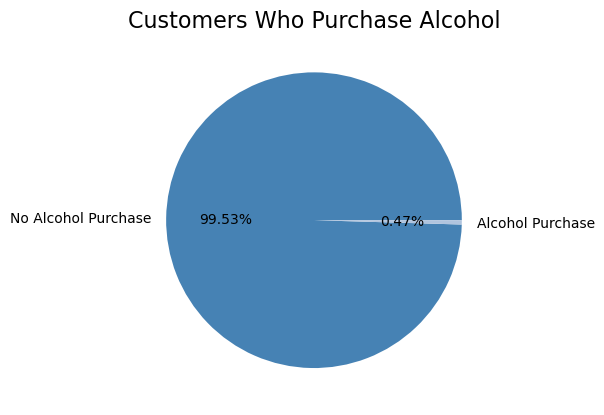

In [41]:
# Pie chart for alcohol purchases
alcohol_purchase_pie = custmrs['alcohol_purchase'].value_counts().plot.pie(labels = ['No Alcohol Purchase', 'Alcohol Purchase'], autopct=('%.2f%%'), colors = ['steelblue', 'lightsteelblue'], label = '')
plt.title("Customers Who Purchase Alcohol", fontsize = '16')

In [42]:
#crosstab on certain goods and regions
crosstab__certain_goods_regions = pd.crosstab (custmrs['region'], custmrs['buys_alcohol'], dropna = False)

In [43]:
crosstab__certain_goods_regions

buys_alcohol,Alcohol purchased
region,
Midwest,34043
Northeast,25017
South,48813
West,36754


#### Aggregate max, mean, min

In [44]:
# Department category expenditure aggregation
custmrs.groupby('department').agg({'prices' : ['mean', 'min', 'max']})

prices           
                      mean  min   max
department                           
alcohol           8.150699  1.0  15.0
babies            7.634399  1.0  15.0
bakery            7.857482  1.0  15.0
beverages         7.682556  1.0  15.0
breakfast         8.031647  1.0  14.9
bulk              8.346919  1.4  14.1
canned goods      7.546660  1.0  15.0
dairy eggs        8.330997  1.0  15.0
deli              7.783347  1.0  15.0
dry goods pasta   7.349370  1.0  15.0
frozen            7.733725  1.0  15.0
household         7.379951  1.0  15.0
international     7.678797  1.0  15.0
meat seafood     16.300034  8.0  25.0
missing           8.660655  1.0  15.0
other             6.961995  1.1  15.0
pantry            8.014482  1.0  20.0
personal care     7.998744  1.0  15.0
pets              7.887489  1.0  15.0
produce           7.980348  1.0  15.0
snacks            4.275555  1.6   7.0

In [45]:
#Department category frequency aggregation
custmrs.groupby('department').agg({'add_to_cart_order' : ['mean', 'min', 'max']})

add_to_cart_order         
                             mean min  max
department                                
alcohol                  5.444578   1   90
babies                  10.577894   1   92
bakery                   8.100412   1  127
beverages                6.988362   1  145
breakfast                9.144345   1  133
bulk                     8.394368   1   75
canned goods             9.969112   1  112
dairy eggs               7.504307   1  137
deli                     8.709131   1  142
dry goods pasta         10.233058   1  104
frozen                   9.012000   1  141
household                8.523310   1  115
international            9.955030   1  119
meat seafood             8.546441   1  133
missing                  9.347255   1   95
other                    8.283107   1   81
pantry                   9.606539   1  136
personal care            8.779944   1  125
pets                     7.736331   1  121
produce                  8.035116   1  139
snacks                   9.199468   1  144

#### Create a suitable graph

Text(0.5, 0, 'Regions')

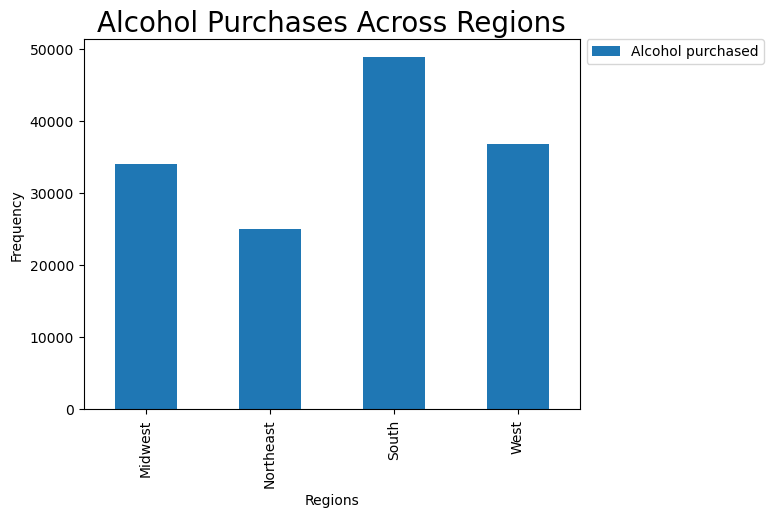

In [46]:
# Create bar graph for Alcohol purchases acros regions
certain_good_regions_chart = crosstab__certain_goods_regions.plot(kind='bar')
certain_good_regions_chart.legend(bbox_to_anchor = (1, 1.02), loc = 'upper left')
plt.title('Alcohol Purchases Across Regions', fontsize = 20)
plt.ylabel('Frequency')
plt.xlabel('Regions')

### Income

In [47]:
# Check descriptive statistics
custmrs['income'].describe()

count    3.096456e+07
mean     9.967587e+04
std      4.314187e+04
min      2.590300e+04
25%      6.729200e+04
50%      9.676500e+04
75%      1.281020e+05
max      5.939010e+05
Name: income, dtype: float64

#### The grouping of income will be divided  as follows:
- Low : < 50,000
- Middle : 50,000 - 150,000
- High : > 150,000

In [48]:
# Create the income groups
custmrs.loc[custmrs['income'] < 50000, 'income_group'] = 'Low'
custmrs.loc[(custmrs['income'] >= 50000) & (custmrs['income'] < 150000), 'income_group'] = 'Middle'
custmrs.loc[custmrs['income'] >= 150000, 'income_group'] = 'High'

In [49]:
# Check income group count
custmrs['income_group'].value_counts(dropna = False)

Middle    23706735
High       3895275
Low        3362554
Name: income_group, dtype: int64

Text(0.5, 1.0, 'Customer Income Categories')

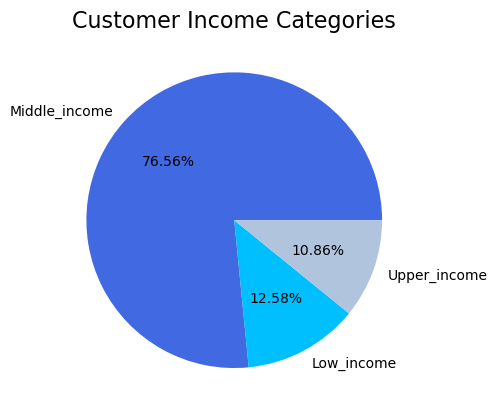

In [50]:
# Pie chart for customer income categories
income_category_pie = custmrs['income_group'].value_counts().plot.pie(labels = ['Middle_income', 'Low_income',\
                    'Upper_income'], autopct=('%.2f%%'), colors = ['royalblue', 'deepskyblue', 'lightsteelblue'], label = '')
plt.title("Customer Income Categories", fontsize = '16')

In [51]:
#crosstab on region and income_statues
crosstab__region_by_income = pd.crosstab (custmrs['region'], custmrs['income_group'], dropna = False)

In [52]:
crosstab__region_by_income

income_group,High,Low,Middle
region,,,
Midwest,917495,783764,5560254
Northeast,677730,587137,4199818
South,1290460,1142572,7878107
West,1009590,849081,6068556


#### Aggregate max, mean, min

In [53]:
#income category expenditure aggregation
custmrs.groupby('income_group').agg({'prices' : ['mean', 'min', 'max']})

prices           
                  mean  min   max
income_group                     
High          7.935695  1.0  25.0
Low           6.707347  1.0  25.0
Middle        7.919333  1.0  25.0

In [54]:
#income category frequency aggregation
custmrs.groupby('income_group').agg({'add_to_cart_order' : ['mean', 'min', 'max']})

add_to_cart_order         
                          mean min  max
income_group                           
High                  8.467190   1  121
Low                   7.320646   1  137
Middle                8.493778   1  145

#### Compare profile across departments

In [55]:
# Compare income categories across departments
ct_income_department = pd.crosstab(custmrs['department'], custmrs['income_group'], dropna = False, normalize = 'columns')
ct_income_department

income_group,High,Low,Middle
department,,,
alcohol,0.006179,0.005367,0.004324
babies,0.013606,0.008696,0.013842
bakery,0.038109,0.031749,0.036514
beverages,0.080451,0.113938,0.079108
breakfast,0.021416,0.027184,0.020923
bulk,0.000942,0.001391,0.001059
canned goods,0.033993,0.023487,0.033775
dairy eggs,0.169243,0.149399,0.169385
deli,0.032319,0.031657,0.032543


#### Create a suitable chart

Text(0.5, 0, 'Regions')

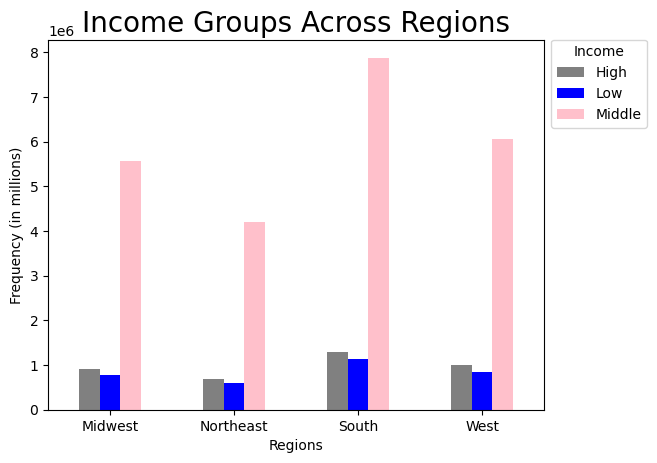

In [56]:
# Bar chart for Income groups across regions
bar_chart_income_by_region = crosstab__region_by_income.plot (kind='bar', rot = 0, color = ['grey', 'blue', 'pink'])
bar_chart_income_by_region.legend(title = 'Income', bbox_to_anchor = (1, 1.02), loc = 'upper left')
plt.title('Income Groups Across Regions', fontsize = 20)
plt.ylabel('Frequency (in millions)')
plt.xlabel('Regions')

### Number of Dependants

In [57]:
# Check descriptive statistics
custmrs['num_dependants'].describe()

count    3.096456e+07
mean     1.501819e+00
std      1.118896e+00
min      0.000000e+00
25%      1.000000e+00
50%      2.000000e+00
75%      3.000000e+00
max      3.000000e+00
Name: num_dependants, dtype: float64

In [58]:
# Create a crosstab between number of dependants and family status
crosstab_dependants_by_region = pd.crosstab(custmrs['region'], custmrs['num_dependants'], dropna = False)

In [59]:
crosstab_dependants_by_region

num_dependants,0,1,2,3
region,,,,
Midwest,1822816,1841417,1809994,1787286
Northeast,1354482,1377009,1351961,1381233
South,2581933,2539625,2603717,2585864
West,1980450,1961055,1967589,2018133


In [60]:
# Create a family size group
custmrs.loc[custmrs['num_dependants'] == 0, 'household_size'] = 'Single Household'
custmrs.loc[(custmrs['num_dependants'] == 1) | (custmrs['num_dependants'] == 2), 'household_size'] = 'Medium Household'
custmrs.loc[custmrs['num_dependants'] >= 3, 'household_size'] = 'Large Household'

In [61]:
# Check the dependent count
custmrs['household_size'].value_counts(dropna = False)

Medium Household    15452367
Large Household      7772516
Single Household     7739681
Name: household_size, dtype: int64

Text(0.5, 1.0, 'Number of Dependants in Household')

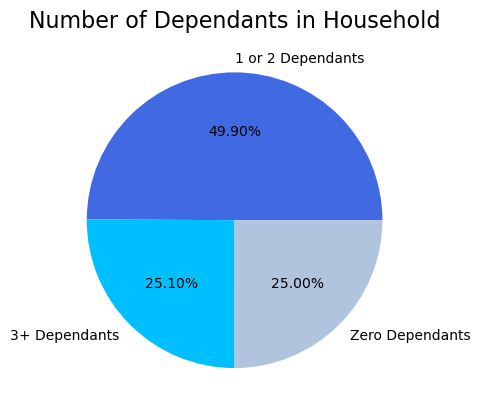

In [109]:
# Pie chart for number of dependants in each household
dependents_category_pie = custmrs['household_size'].value_counts().plot.pie(labels = ['1 or 2 Dependants', '3+ Dependants',\
                    'Zero Dependants'], autopct=('%.2f%%'), colors = ['royalblue', 'deepskyblue', 'lightsteelblue'], label = '')
plt.title("Number of Dependants in Household", fontsize = '16')

In [63]:
# Create a crosstab between dependents and family status
crosstab_fam_dep = pd.crosstab(custmrs['region'], custmrs['household_size'], dropna = False)

In [64]:
crosstab_fam_dep

household_size,Large Household,Medium Household,Single Household
region,,,
Midwest,1787286,3651411,1822816
Northeast,1381233,2728970,1354482
South,2585864,5143342,2581933
West,2018133,3928644,1980450


#### Aggregate max, mean, min

In [65]:
#Household category expenditure aggregation
custmrs.groupby('household_size').agg({'prices' : ['mean', 'min', 'max']})

prices           
                      mean  min   max
household_size                       
Large Household   7.792076  1.0  25.0
Medium Household  7.789111  1.0  25.0
Single Household  7.788800  1.0  25.0

In [66]:
#income category frequency aggregation
custmrs.groupby('household_size').agg({'add_to_cart_order' : ['mean', 'min', 'max']})

add_to_cart_order         
                              mean min  max
household_size                             
Large Household           8.375061   1  145
Medium Household          8.370250   1  114
Single Household          8.336567   1  137

#### Compare profile across departments

In [67]:
# Compare Household size categories across departments
ct_income_department = pd.crosstab(custmrs['department'], custmrs['household_size'], dropna = False, normalize = 'columns')
ct_income_department

household_size,Large Household,Medium Household,Single Household
department,,,
alcohol,0.004803,0.004560,0.004758
babies,0.013198,0.013233,0.013350
bakery,0.036001,0.036215,0.036357
beverages,0.082461,0.083200,0.083381
breakfast,0.021527,0.021815,0.021504
bulk,0.001081,0.001103,0.001034
canned goods,0.032850,0.032728,0.032433
dairy eggs,0.166775,0.167388,0.167239
deli,0.032498,0.032219,0.032738


#### Create a suitable chart

Text(0.5, 0, 'Regions')

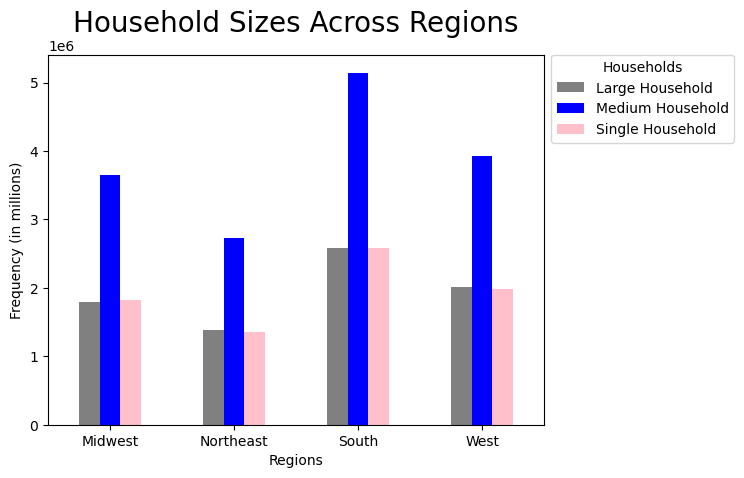

In [68]:
# Bar chart for Household sizes across regions
bar_chart_dependant_by_region = crosstab_fam_dep.plot (kind='bar', rot = 0, color = ['grey', 'blue', 'pink'])
bar_chart_dependant_by_region.legend(title = 'Households', bbox_to_anchor = (1, 1.02), loc = 'upper left')
plt.title('Household Sizes Across Regions', fontsize = 20)
plt.ylabel('Frequency (in millions)')
plt.xlabel('Regions')

### Are there differences in ordering habits based on a customer's loyalty status?

In [69]:
# Compare orders by region and dow
loyalty_odow_crosstab = pd.crosstab(custmrs['orders_day_of_week'], custmrs['loyalty_flag'], dropna = False)
loyalty_odow_crosstab

loyalty_flag,Loyal customer,New customer,Regular customer
orders_day_of_week,,,
0,1754731,984879,3169000
1,1843401,818902,2749383
2,1352343,625288,2047075
3,1266495,560418,1842622
4,1292042,535931,1797021
5,1456715,587718,1989296
6,1318366,690559,2282379


Text(0.5, 0, 'Day of Week')

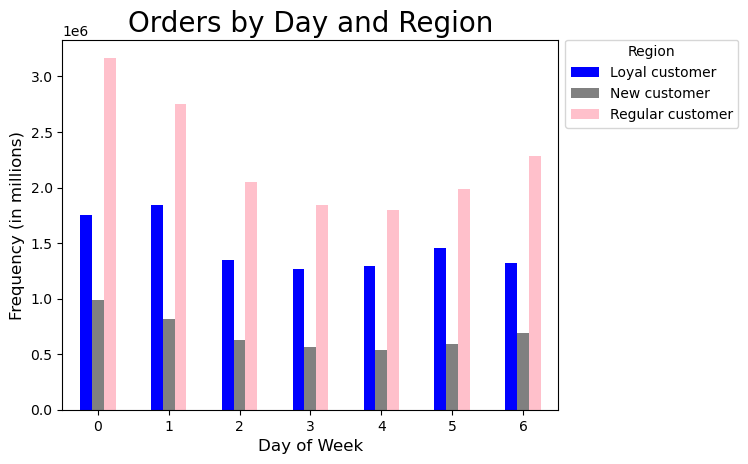

In [88]:
# Create a stacked bar chart for region and dow
bar_loyalty_odow = loyalty_odow_crosstab.plot(kind = 'bar', rot = 0,color = ['blue', 'grey', 'pink'])
bar_loyalty_odow.legend(title = 'Region', bbox_to_anchor = (1, 1.02), loc = 'upper left')
plt.title('Orders by Day and Region', fontsize = 20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Day of Week', fontsize = 12)

#### Is there a connection between age and family status in terms of ordering habits?

In [71]:
# Compare orders by age group and family status
age_family_crosstab = pd.crosstab(custmrs['age_group'], custmrs['marital_status'], dropna = False)
age_family_crosstab

marital_status,divorced/widowed,living with parents and siblings,married,single
age_group,,,,
Middle-Aged,623313,0,9046762,2433835
Senior,2021958,0,6173586,0
Young Adult,0,1481172,6523363,2660575


Text(0.5, 0, 'Age Group')

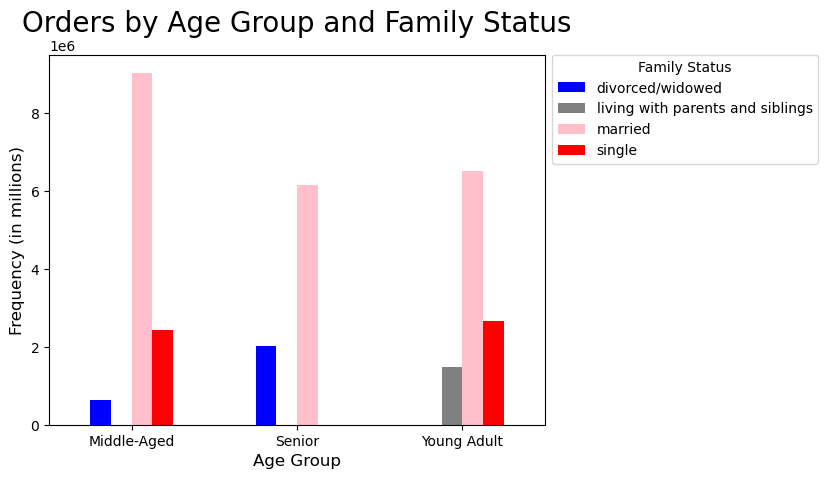

In [86]:
# Create a stacked bar chart for age and family status
bar_age_family = age_family_crosstab.plot(kind = 'bar', rot = 0,color = ['blue', 'grey', 'pink', 'red'])
bar_age_family.legend(title = 'Family Status', bbox_to_anchor = (1, 1.02), loc = 'upper left')
plt.title('Orders by Age Group and Family Status', fontsize = 20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Age Group', fontsize = 12)

In [73]:
# Compare orders by region and dow
region_dow_crosstab = pd.crosstab(custmrs['orders_day_of_week'], custmrs['region'], dropna = False)
region_dow_crosstab

region,Midwest,Northeast,South,West
orders_day_of_week,,,,
0,1390189,1043698,1955352,1519371
1,1263655,954332,1808348,1385351
2,947370,713159,1340387,1023790
3,855316,649305,1229002,935912
4,851501,637781,1205497,930215
5,943396,716128,1342849,1031356
6,1010086,750282,1429704,1101232


Text(0.5, 0, 'Day of Week')

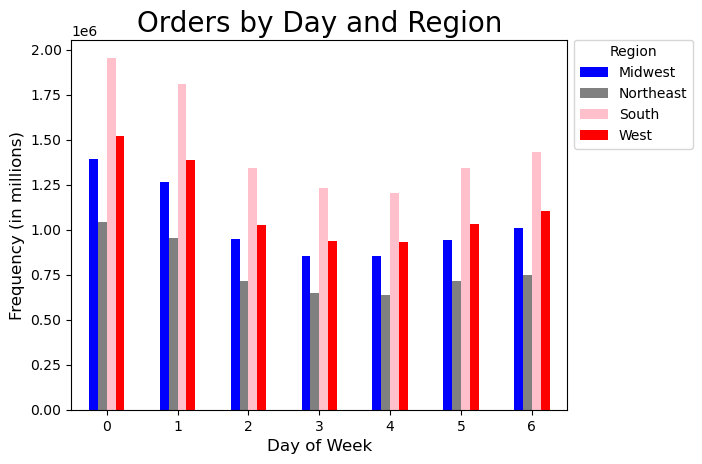

In [87]:
# Create a stacked bar chart for region and dow
bar_region_dow = region_dow_crosstab.plot(kind = 'bar', rot = 0,color = ['blue', 'grey', 'pink', 'red'])
bar_region_dow.legend(title = 'Region', bbox_to_anchor = (1, 1.02), loc = 'upper left')
plt.title('Orders by Day and Region', fontsize = 20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Day of Week', fontsize = 12)

In [75]:
region_ohod_crosstab = pd.crosstab(custmrs['order_hour_of_day'], custmrs['region'], dropna = False)
region_ohod_crosstab

region,Midwest,Northeast,South,West
order_hour_of_day,,,,
0,48192,36600,69767,53483
1,25879,20529,35769,27444
2,16136,11842,20668,17045
3,11298,8843,16458,12197
4,12015,9043,17277,12428
5,19061,14733,29571,21053
6,64885,49025,95583,71520
7,201794,154031,288357,219031
8,384854,294134,559785,420337


Text(0.5, 0, 'Day of Week')

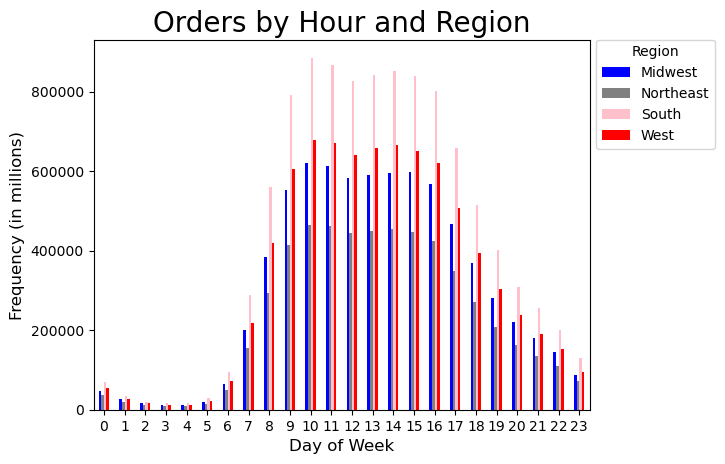

In [107]:
# Create a stacked bar chart for region and dow
bar_region_ohod = region_ohod_crosstab.plot(kind = 'bar', rot = 0, color = ['blue', 'grey', 'pink', 'red'])
bar_region_ohod.legend(title = 'Region', bbox_to_anchor = (1, 1.02), loc = 'upper left')
plt.title('Orders by Hour and Region', fontsize = 20)
plt.ylabel('Frequency (in millions)', fontsize = 12)
plt.xlabel('Day of Week', fontsize = 12)

In [108]:
bar_region_ohod.figure.savefig(os.path.join(path_visual, 'bar_region_ohod.png'), bbox_inches = 'tight')

In [89]:
bar_region_dow.figure.savefig(os.path.join(path_visual, 'bar_region_dow.png'), bbox_inches = 'tight')

In [91]:
bar_age_family.figure.savefig(os.path.join(path_visual, 'bar_age_family.png'), bbox_inches = 'tight')

In [92]:
bar_departments.figure.savefig(os.path.join(path_visual, 'bar_departments.png'), bbox_inches = 'tight')

In [93]:
age_category_pie.figure.savefig(os.path.join(path_visual, 'age_category_pie.png'), bbox_inches = 'tight')

In [102]:
bar_chart_age_by_region.figure.savefig(os.path.join(path_visual, 'bar_chart_age_by_region.png'), bbox_inches = 'tight')

In [103]:
alcohol_purchase_pie.figure.savefig(os.path.join(path_visual, 'alcohol_purchase_pie.png'), bbox_inches = 'tight')

In [95]:
certain_good_regions_chart.figure.savefig(os.path.join(path_visual, 'certain_good_regions_chart.png'), bbox_inches = 'tight')

In [96]:
income_category_pie.figure.savefig(os.path.join(path_visual, 'income_category_pie.png'), bbox_inches = 'tight')

In [97]:
bar_chart_income_by_region.figure.savefig(os.path.join(path_visual, 'bar_chart_income_by_region.png'), bbox_inches = 'tight')

In [110]:
dependents_category_pie.figure.savefig(os.path.join(path_visual, 'dependents_category_pie.png'), bbox_inches = 'tight')

In [99]:
bar_chart_dependant_by_region.figure.savefig(os.path.join(path_visual, 'bar_chart_dependant_by_region.png'), bbox_inches = 'tight')

In [100]:
bar_loyalty_odow.figure.savefig(os.path.join(path_visual, 'bar_loyalty_odow.png'), bbox_inches = 'tight')

In [101]:
bar_age_family.figure.savefig(os.path.join(path_visual, 'bar_age_family.png'), bbox_inches = 'tight')

In [106]:
ords_prods_all.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'instacart_customers_4-25.pkl'))